In [1]:
!pip install git+https://github.com/single-cell-genetics/XClone

  Cloning https://github.com/single-cell-genetics/XClone to /tmp/pip-req-build-jue_jn7u
  Running command git clone --filter=blob:none --quiet https://github.com/single-cell-genetics/XClone /tmp/pip-req-build-jue_jn7u
  Resolved https://github.com/single-cell-genetics/XClone to commit c2288b61bb3e89cfa1a95faf19585d4812f319cb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
%load_ext autoreload
%autoreload 2

import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
print("scipy", scipy.__version__)

xclone.pp.efficiency_preview()

[autoreload of scipy.sparse._csc failed: Traceback (most recent call last):
  File "/home/sc5625/miniconda3/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sc5625/miniconda3/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
  File "/home/sc5625/miniconda3/lib/python3.13/importlib/__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1026, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/home/sc5625/miniconda3/lib/python3.13/site-packages/scipy/sparse/_csc.py", line 11, in <module>
    from ._sparsetools import csc_tocsr, expandptr
ImportError: cannot import name 'csc_toc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 190.2 MB/s eta 0:00:00a 0:00:01
scipy 1.15.3
(Running XClone 0.3.10)
2025-07-16 02:50:57
[XClone efficiency] multiprocessing cpu total count in your device 16


In [ ]:
RDR_file = "defendseq_rdr/matrix.mtx"
mtx_barcodes_file = "defendseq_rdr/barcodes.tsv" # cell barcodes
regions_anno_file = "defendseq_rdr/features.tsv" # feature annnotation
RDR_adata = xclone.pp.xclonedata(RDR_file,
                     'RDR',
                     mtx_barcodes_file,
                     regions_anno_file,
                     genome_mode = "hg38_genes",
                     data_notes = None)

/home/sc5625/miniconda3/envs/xclone_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [39]:
RDR_adata.var.columns = ['start', 'stop', 'GeneName']
RDR_adata.var.index.name = 'chr'
RDR_adata.var = RDR_adata.var.reset_index()
RDR_adata.var = RDR_adata.var.set_index('GeneName')
RDR_adata.var = RDR_adata.var[['chr', 'start', 'stop']]

RDR_adata.var

chr      start       stop
GeneName                          
A1BG      19   58345182   58353492
A1BG-AS1  19   58351969   58355183
A1CF      10   50799408   50885675
A2M       12    9067707    9116229
A2M-AS1   12    9065176    9068055
...       ..        ...        ...
ZYG11A     1   52842759   52894995
ZYG11B     1   52726452   52827336
ZYX        7  143381344  143391111
ZZEF1     17    4004444    4143030
ZZZ3       1   77562415   77683427

[28277 rows x 3 columns]

In [ ]:
twocol_barcodes_df = pd.read_csv("~/numbat_defendseq/barcodes.txt", delimiter="\t", header=None)
twocol_barcodes_df.columns = ["Barcode", "Type"]  # Rename columns for clarity

# Set the barcodes DataFrame index to "Barcode" for alignment
twocol_barcodes_df.set_index("Barcode", inplace=True)
# Add cell types to adata.obs by aligning the DataFrame to adata.obs.index
RDR_adata.obs = twocol_barcodes_df.loc[RDR_adata.obs.index]

# Verify changes
RDR_adata.obs

Type
AAAGCAAGTCCTCCAA  Oligodendrocyte
AAAGCGGGTACAATGT       Tumor_EGFR
AAAGCGGGTATCTGGA     Tumor_PDGFRA
AAAGCTTGTGAGGTGA       Tumor_EGFR
AAAGGACGTGCACGCA       Tumor_EGFR
...                           ...
TTTGTCCCATATAACC       Tumor_EGFR
TTTGTGAAGGCGGATG       Tumor_EGFR
TTTGTGGCAAATTGCT       Tumor_EGFR
TTTGTGTTCCTCATGC       Tumor_EGFR
TTTGTGTTCTACCTAT       Tumor_EGFR

[747 rows x 1 columns]

In [ ]:
arm_info_df = pd.read_csv("~/xclone_defendseq/ucsc_hg38_chrom_arm_info.txt", delimiter="\t", header=[0])
arm_info_df

#chrom  chromStart  chromEnd    name gieStain
0                        chr1           0   2300000  p36.33     gneg
1                        chr1     2300000   5300000  p36.32   gpos25
2                        chr1     5300000   7100000  p36.31     gneg
3                        chr1     7100000   9100000  p36.23   gpos25
4                        chr1     9100000  12500000  p36.22     gneg
...                       ...         ...       ...     ...      ...
1544  chr22_KI270735v1_random           0     42811     NaN     gneg
1545  chr22_KI270736v1_random           0    181920     NaN     gneg
1546  chr22_KI270737v1_random           0    103838     NaN     gneg
1547  chr22_KI270738v1_random           0     99375     NaN     gneg
1548  chr22_KI270739v1_random           0     73985     NaN     gneg

[1549 rows x 5 columns]

In [49]:
RDR_adata.var = RDR_adata.var.reset_index()
gene_df = RDR_adata.var
gene_df

GeneName chr      start       stop
0          A1BG  19   58345182   58353492
1      A1BG-AS1  19   58351969   58355183
2          A1CF  10   50799408   50885675
3           A2M  12    9067707    9116229
4       A2M-AS1  12    9065176    9068055
...         ...  ..        ...        ...
28272    ZYG11A   1   52842759   52894995
28273    ZYG11B   1   52726452   52827336
28274       ZYX   7  143381344  143391111
28275     ZZEF1  17    4004444    4143030
28276      ZZZ3   1   77562415   77683427

[28277 rows x 4 columns]

In [52]:
# make sure everything is an integer
arm_info_df["chromStart"] = arm_info_df["chromStart"].astype(int)
arm_info_df["chromEnd"] = arm_info_df["chromEnd"].astype(int)
gene_df["start"] = gene_df["start"].astype(int)
gene_df["stop"] = gene_df["stop"].astype(int)

In [61]:
def find_band(gene_row, band_df):
    chrom = "chr" + gene_row["chr"] # make sure to add chr prefix so it matches
    start = gene_row["start"]
    end = gene_row["stop"]
    
    # Find the cytoband that overlaps the gene
    band_match = band_df[
        (band_df["#chrom"] == chrom) &
        (band_df["chromStart"] <= start) &
        (band_df["chromEnd"] >= end)
    ]
    
    if not band_match.empty:
        band_row = band_match.iloc[0]
        arm = band_row["name"][0]  # First letter of band (p/q)
        return pd.Series({
            "band": band_row["name"],
            "arm": arm,
            "chr_arm": f"{band_row['#chrom']}_{arm}"[3:] # remove chr prefix
        })
    else:
        return pd.Series({
            "band": None,
            "arm": None,
            "chr_arm": None
        })


# Apply to all rows in gene_df
gene_df_with_band = gene_df.copy()
band_info = gene_df.apply(lambda row: find_band(row, arm_info_df), axis=1)

# Merge result
gene_df_with_band = pd.concat([gene_df_with_band, band_info], axis=1)

In [62]:
gene_df_with_band

GeneName chr      start       stop    band arm chr_arm
0          A1BG  19   58345182   58353492  q13.43   q    19_q
1      A1BG-AS1  19   58351969   58355183  q13.43   q    19_q
2          A1CF  10   50799408   50885675  q11.23   q    10_q
3           A2M  12    9067707    9116229  p13.31   p    12_p
4       A2M-AS1  12    9065176    9068055  p13.31   p    12_p
...         ...  ..        ...        ...     ...  ..     ...
28272    ZYG11A   1   52842759   52894995   p32.3   p     1_p
28273    ZYG11B   1   52726452   52827336   p32.3   p     1_p
28274       ZYX   7  143381344  143391111     q34   q     7_q
28275     ZZEF1  17    4004444    4143030   p13.2   p    17_p
28276      ZZZ3   1   77562415   77683427   p31.1   p     1_p

[28277 rows x 7 columns]

In [63]:
cols = [col for col in gene_df_with_band if col != 'band'] + ['band']
gene_df_with_band = gene_df_with_band[cols]

In [79]:
gene_df_with_band.shape

(28277, 7)

In [65]:
RDR_adata.var = gene_df_with_band
RDR_adata.var

GeneName chr      start       stop arm chr_arm    band
0          A1BG  19   58345182   58353492   q    19_q  q13.43
1      A1BG-AS1  19   58351969   58355183   q    19_q  q13.43
2          A1CF  10   50799408   50885675   q    10_q  q11.23
3           A2M  12    9067707    9116229   p    12_p  p13.31
4       A2M-AS1  12    9065176    9068055   p    12_p  p13.31
...         ...  ..        ...        ...  ..     ...     ...
28272    ZYG11A   1   52842759   52894995   p     1_p   p32.3
28273    ZYG11B   1   52726452   52827336   p     1_p   p32.3
28274       ZYX   7  143381344  143391111   q     7_q     q34
28275     ZZEF1  17    4004444    4143030   p    17_p   p13.2
28276      ZZZ3   1   77562415   77683427   p     1_p   p31.1

[28277 rows x 7 columns]

In [67]:
RDR_adata.obs["cell_type"] = RDR_adata.obs["Type"].apply(lambda x: "T" if "Tumor" in x else "N")
RDR_adata.obs

Type cell_type
AAAGCAAGTCCTCCAA  Oligodendrocyte         N
AAAGCGGGTACAATGT       Tumor_EGFR         T
AAAGCGGGTATCTGGA     Tumor_PDGFRA         T
AAAGCTTGTGAGGTGA       Tumor_EGFR         T
AAAGGACGTGCACGCA       Tumor_EGFR         T
...                           ...       ...
TTTGTCCCATATAACC       Tumor_EGFR         T
TTTGTGAAGGCGGATG       Tumor_EGFR         T
TTTGTGGCAAATTGCT       Tumor_EGFR         T
TTTGTGTTCCTCATGC       Tumor_EGFR         T
TTTGTGTTCTACCTAT       Tumor_EGFR         T

[747 rows x 2 columns]

In [83]:
RDR_adata.var.index = RDR_adata.var.index.astype(str)
RDR_adata.obs.index = RDR_adata.obs.index.astype(str)

In [85]:
backup_RDR = RDR_adata.copy()
backup_RDR

AnnData object with n_obs × n_vars = 747 × 27712
    obs: 'Type', 'cell_type'
    var: 'GeneName', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'raw_expr'

In [90]:
# need this, otherwise chromosomes bunch up in the xclone plots

import pandas as pd

# Set chromosome order: 1-22, X, Y
chrom_order = [str(i) for i in range(1, 23)] + ['X', 'Y']
RDR_adata.var['chr'] = RDR_adata.var['chr'].astype(pd.CategoricalDtype(categories=chrom_order, ordered=True))

# Sort the var dataframe accordingly
RDR_adata.var = RDR_adata.var.sort_values(by=['chr', 'GeneName'])
RDR_adata.var = RDR_adata.var.reset_index(drop=True)


In [ ]:
AD_file = "defendseq_baf/3_baf_fc/xcltk.AD.mtx"
DP_file = "defendseq_baf/3_baf_fc/xcltk.DP.mtx"
mtx_barcodes_file = "defendseq_rdr/barcodes.tsv" # cell barcodes
regions_anno_file = "defendseq_rdr/features.tsv" # feature annnotation

# use default gene annotation
BAF_adata = xclone.pp.xclonedata([AD_file, DP_file], 'BAF',
                                 mtx_barcodes_file,
                                 regions_anno_file,
                                 genome_mode = "hg38_genes")

In [102]:
common_cells = BAF_adata.obs_names.intersection(RDR_adata.obs_names)

# Filter BAF_adata to only keep those cells, preserving original order
mask = BAF_adata.obs_names.isin(common_cells)
BAF_adata = BAF_adata[mask, :].copy()

# For obs (cell annotations), if you want to update from RDR_adata:
BAF_adata.obs = RDR_adata.obs.loc[BAF_adata.obs_names].copy()
BAF_adata.obs

Type cell_type
AAAGCAAGTCCTCCAA  Oligodendrocyte         N
AAAGCGGGTACAATGT       Tumor_EGFR         T
AAAGCGGGTATCTGGA     Tumor_PDGFRA         T
AAAGCTTGTGAGGTGA       Tumor_EGFR         T
AAAGGACGTGCACGCA       Tumor_EGFR         T
...                           ...       ...
TTTGTCCCATATAACC       Tumor_EGFR         T
TTTGTGAAGGCGGATG       Tumor_EGFR         T
TTTGTGGCAAATTGCT       Tumor_EGFR         T
TTTGTGTTCCTCATGC       Tumor_EGFR         T
TTTGTGTTCTACCTAT       Tumor_EGFR         T

[747 rows x 2 columns]

In [ ]:
import numpy as np

# get gene names
gene_names_in_baf = BAF_adata.var.iloc[:, -1]

matched_genes_mask = gene_names_in_baf.isin(RDR_adata.var['GeneName'])

BAF_adata = BAF_adata[:, matched_genes_mask].copy()

matched_gene_names = gene_names_in_baf[matched_genes_mask]
rdr_var_matched = RDR_adata.var.set_index('GeneName').loc[matched_gene_names]
BAF_adata.var = rdr_var_matched.reset_index()

BAF_adata.var


GeneName chr      start       stop arm chr_arm    band
0          A1BG  19   58345182   58353492   q    19_q  q13.43
1      A1BG-AS1  19   58351969   58355183   q    19_q  q13.43
2          A1CF  10   50799408   50885675   q    10_q  q11.23
3           A2M  12    9067707    9116229   p    12_p  p13.31
4       A2M-AS1  12    9065176    9068055   p    12_p  p13.31
...         ...  ..        ...        ...  ..     ...     ...
27707    ZYG11A   1   52842759   52894995   p     1_p   p32.3
27708    ZYG11B   1   52726452   52827336   p     1_p   p32.3
27709       ZYX   7  143381344  143391111   q     7_q     q34
27710     ZZEF1  17    4004444    4143030   p    17_p   p13.2
27711      ZZZ3   1   77562415   77683427   p     1_p   p31.1

[27712 rows x 7 columns]

In [111]:
BAF_adata.var.index = BAF_adata.var.index.astype(str)
BAF_adata.obs.index = BAF_adata.obs.index.astype(str)

In [112]:
# need this, otherwise chromosomes bunch up in the xclone plots
import pandas as pd

# Set chromosome order: 1-22, X, Y
chrom_order = [str(i) for i in range(1, 23)] + ['X', 'Y']
BAF_adata.var['chr'] = BAF_adata.var['chr'].astype(pd.CategoricalDtype(categories=chrom_order, ordered=True))

# Sort the var dataframe accordingly
BAF_adata.var = BAF_adata.var.sort_values(by=['chr', 'GeneName'])
BAF_adata.var = BAF_adata.var.reset_index(drop=True)
BAF_adata.var

GeneName chr      start       stop arm chr_arm     band
0      A3GALT2   1   33306765   33321098   p     1_p    p35.1
1      AADACL3   1   12716109   12728760   p     1_p   p36.21
2      AADACL4   1   12644084   12667076   p     1_p   p36.21
3        ABCA4   1   93992833   94121148   p     1_p    p22.1
4       ABCB10   1  229516581  229558707   q     1_q   q42.13
...        ...  ..        ...        ...  ..     ...      ...
27707    VCY1B   Y   13985771   14056958   q     Y_q  q11.221
27708     XKRY   Y   17768979   18137029   q     Y_q  q11.222
27709    XKRY2   Y   17768979   18137029   q     Y_q  q11.222
27710      ZFY   Y    2935380    2982506   p     Y_p    p11.2
27711  ZFY-AS1   Y    2966818    3002626   p     Y_p    p11.2

[27712 rows x 7 columns]

In [115]:
backup_BAF = BAF_adata.copy()
backup_BAF

AnnData object with n_obs × n_vars = 747 × 27712
    obs: 'Type', 'cell_type'
    var: 'GeneName', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'AD', 'DP'

In [ ]:
import gzip
import re
import pandas as pd
import numpy as np

gtf_file = "gencode.v48.annotation.gtf.gz"
gene_name_to_id = {}

with gzip.open(gtf_file, 'rt') as f:
    for line in f:
        if line.startswith("#"): continue
        fields = line.strip().split('\t')
        if fields[2] != "gene": continue
        attr_field = fields[8]
        gene_id = re.search('gene_id "([^"]+)"', attr_field).group(1)
        gene_name = re.search('gene_name "([^"]+)"', attr_field).group(1)
        gene_name_to_id[gene_name] = gene_id

gene_names = BAF_adata.var["GeneName"]
gene_ids = gene_names.map(gene_name_to_id)

BAF_adata.var["GeneID"] = gene_ids

mask = ~BAF_adata.var["GeneID"].isna()
BAF_adata = BAF_adata[:, mask.values].copy()
BAF_adata.var

GeneName chr      start       stop arm chr_arm     band  \
0      A3GALT2   1   33306765   33321098   p     1_p    p35.1   
1      AADACL3   1   12716109   12728760   p     1_p   p36.21   
2      AADACL4   1   12644084   12667076   p     1_p   p36.21   
3        ABCA4   1   93992833   94121148   p     1_p    p22.1   
4       ABCB10   1  229516581  229558707   q     1_q   q42.13   
...        ...  ..        ...        ...  ..     ...      ...   
27706      VCY   Y   13985771   14056958   q     Y_q  q11.221   
27707    VCY1B   Y   13985771   14056958   q     Y_q  q11.221   
27708     XKRY   Y   17768979   18137029   q     Y_q  q11.222   
27710      ZFY   Y    2935380    2982506   p     Y_p    p11.2   
27711  ZFY-AS1   Y    2966818    3002626   p     Y_p    p11.2   

                   GeneID  
0       ENSG00000184389.9  
1      ENSG00000188984.12  
2       ENSG00000204518.3  
3      ENSG00000198691.14  
4       ENSG00000135776.5  
...                   ...  
27706   ENSG00000129864.7  
27707   ENSG00000129862.7  
27708   ENSG00000250868.5  
27710  ENSG00000067646.12  
27711   ENSG00000233070.2  

[25240 rows x 8 columns]

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
KNN_npcs                       40
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_sims/xclone_defendseq_outputs/ds_rdr
_plot_suffix                   
_start                         1750892036.8973253
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   defendseq
develop_mode                   False
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
get_marker_genes               True
guide_chr_anno_key             chr_arm
guide_c

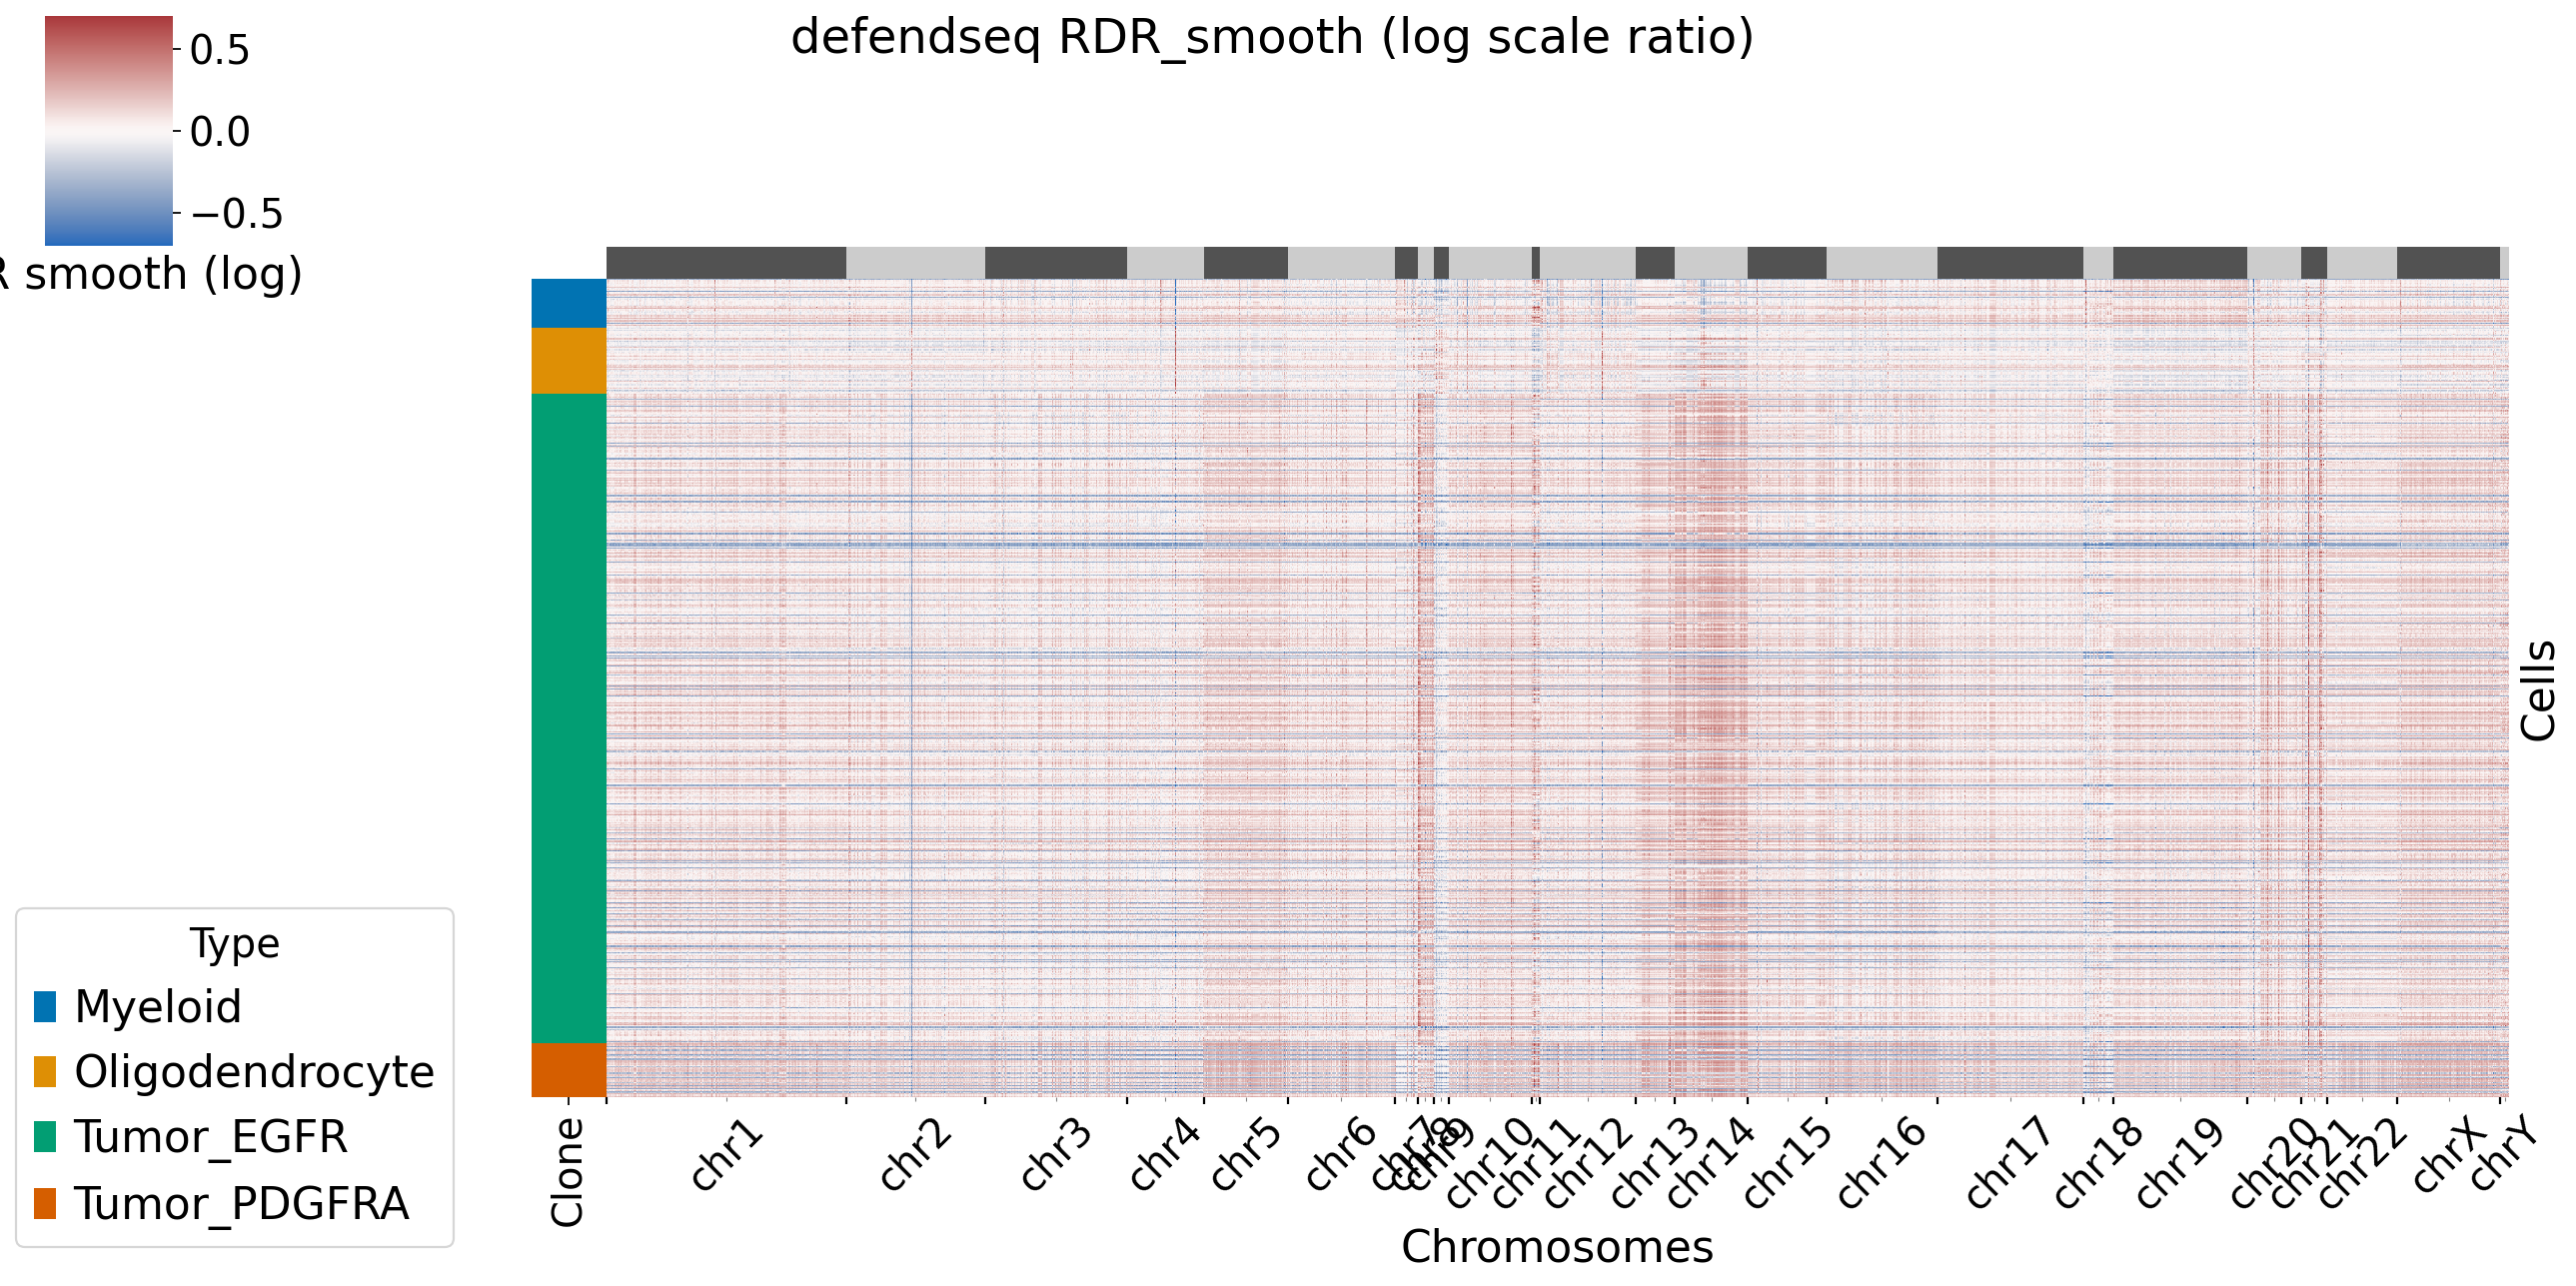

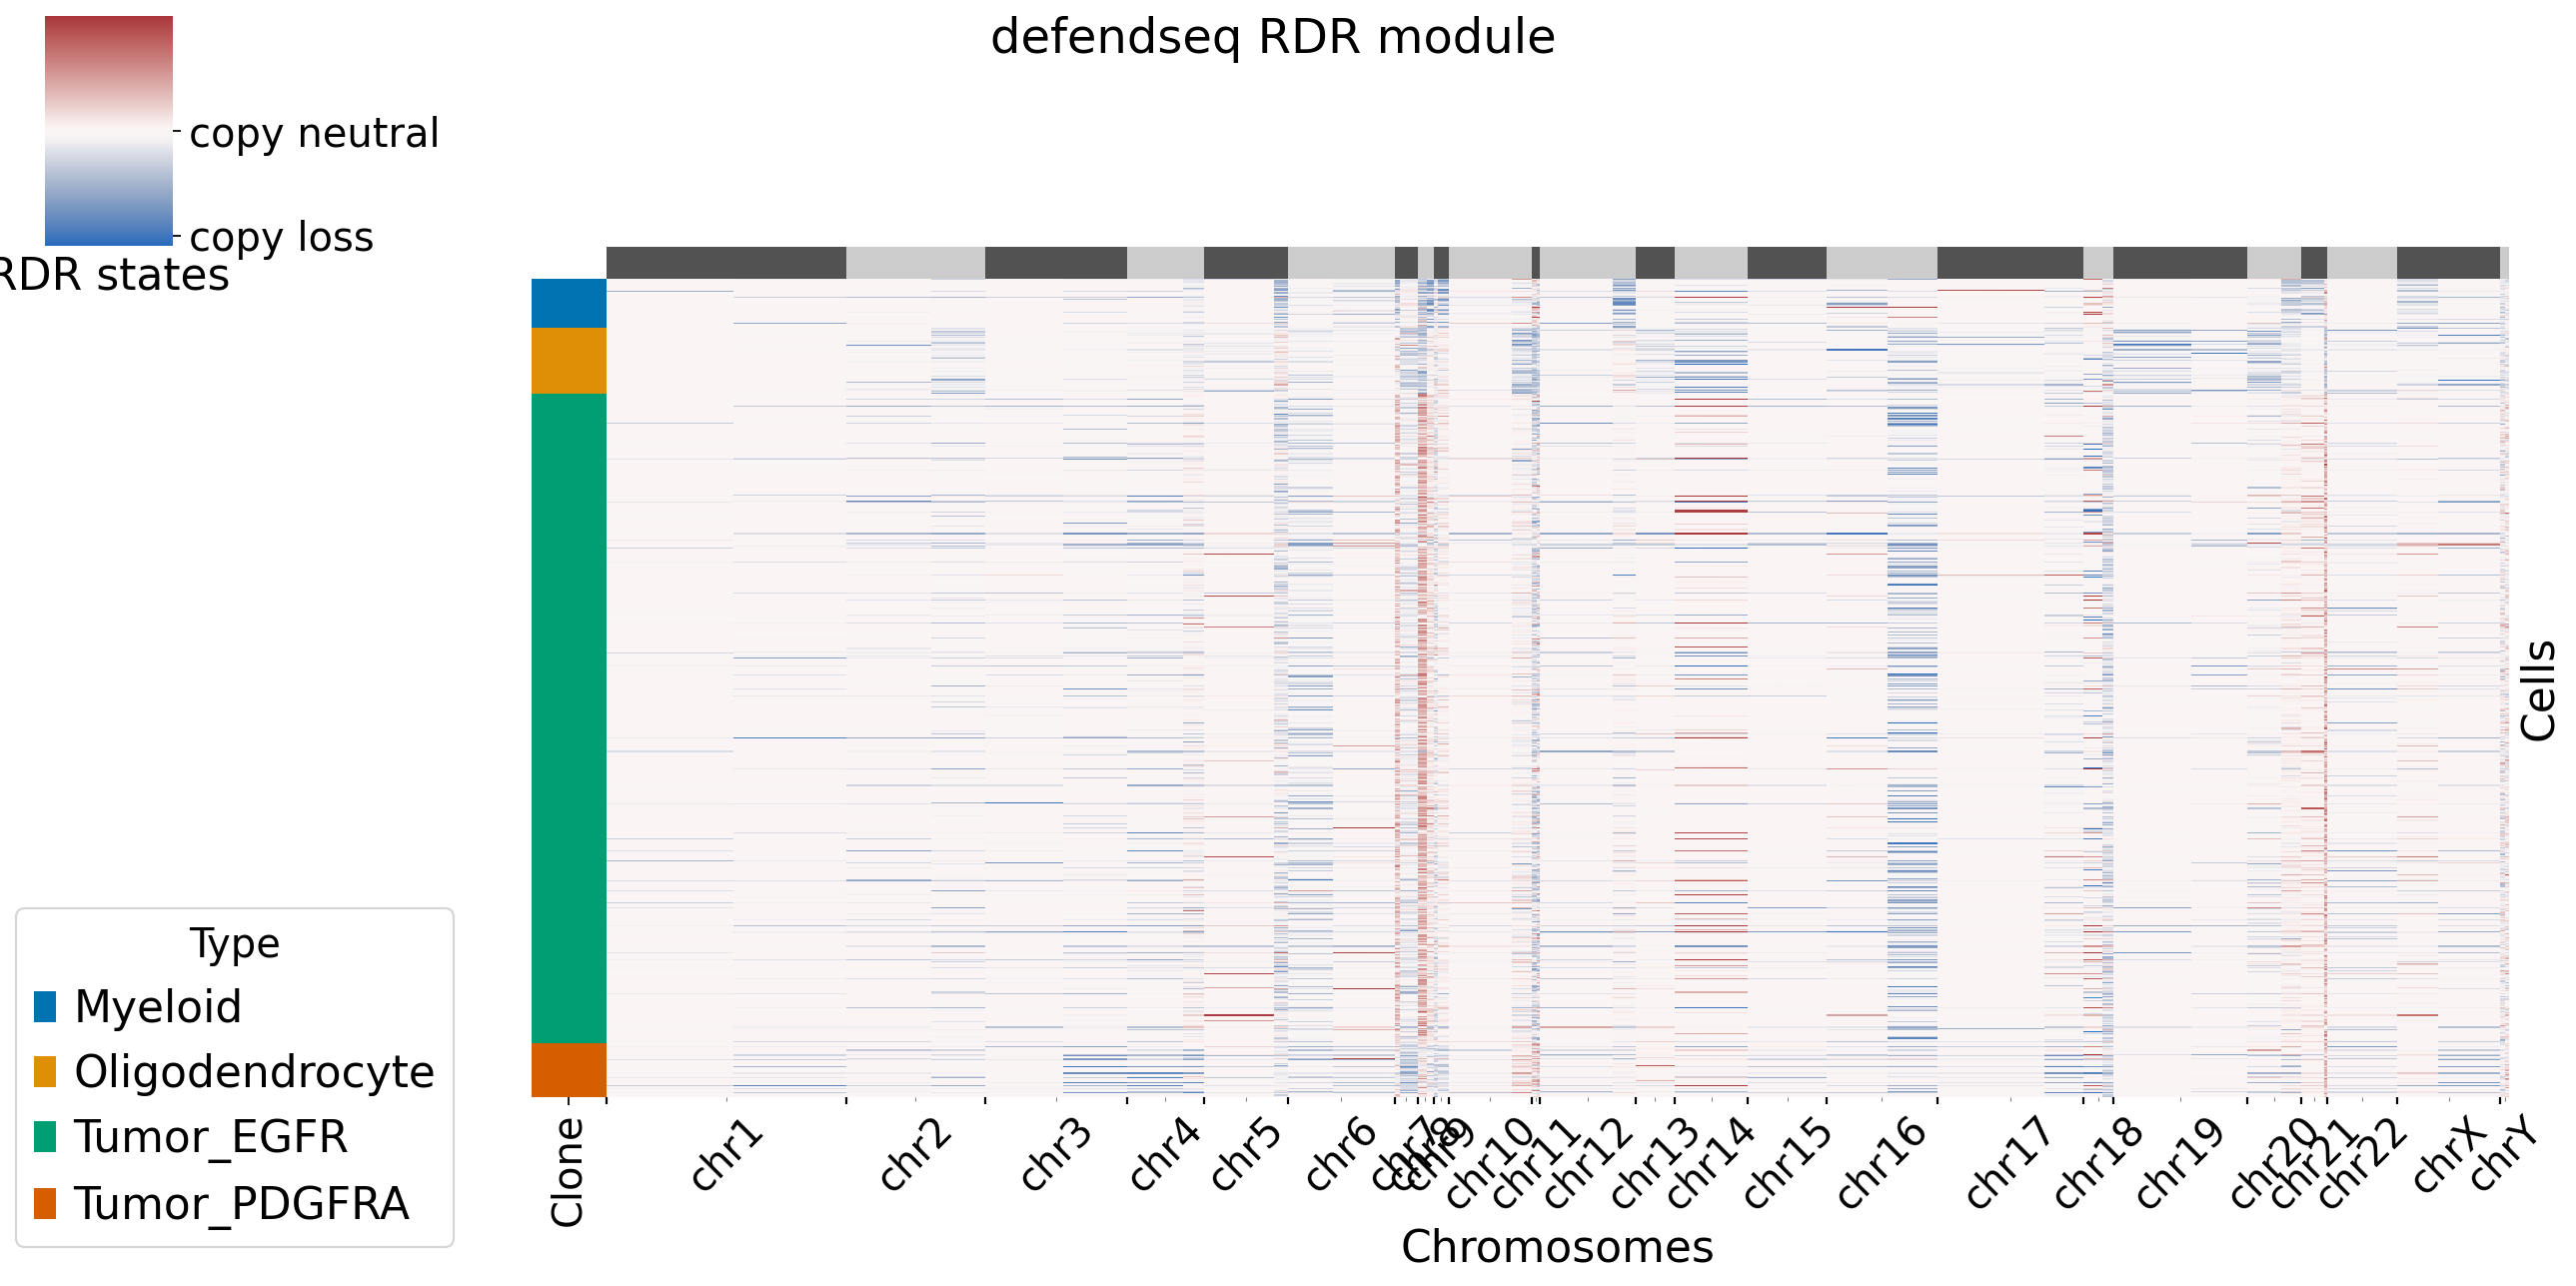

In [ ]:
xconfig = xclone.XCloneConfig(dataset_name = "defendseq", module = "RDR", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_defendseq/xclone_defendseq_outputs/ds_rdr"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.top_n_marker = 25
xconfig.marker_group_anno_key = "cell_type"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.3, 0.4, 0.3])


xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
BAF_denoise_GMM_comp           2
BAF_denoise_GMM_detection      True
BAF_denoise_cellprop_cutoff    0.05
CNV_N_components               5
HMM_brk                        chr_arm
HMM_nproc                      40
KNN_Xlayer                     fill_BAF_phased
KNN_connect_use_key            connectivities_expr
KNN_neighbors                  10
KNN_npcs                       40
RDR_file                       /home/sc5625/xclone_sims/xclone_defendseq_outputs/ds_rdr/data/RDR_adata_KNN_HMM_post.h5ad
WMA_smooth_key                 chr_arm
WMA_window_size                6
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_sims/xclone_defendseq_outputs/ds_baf
_plot_suffix                   
_start                         1750892157.995992
_vector_friendly               True
baf_bias_mode            

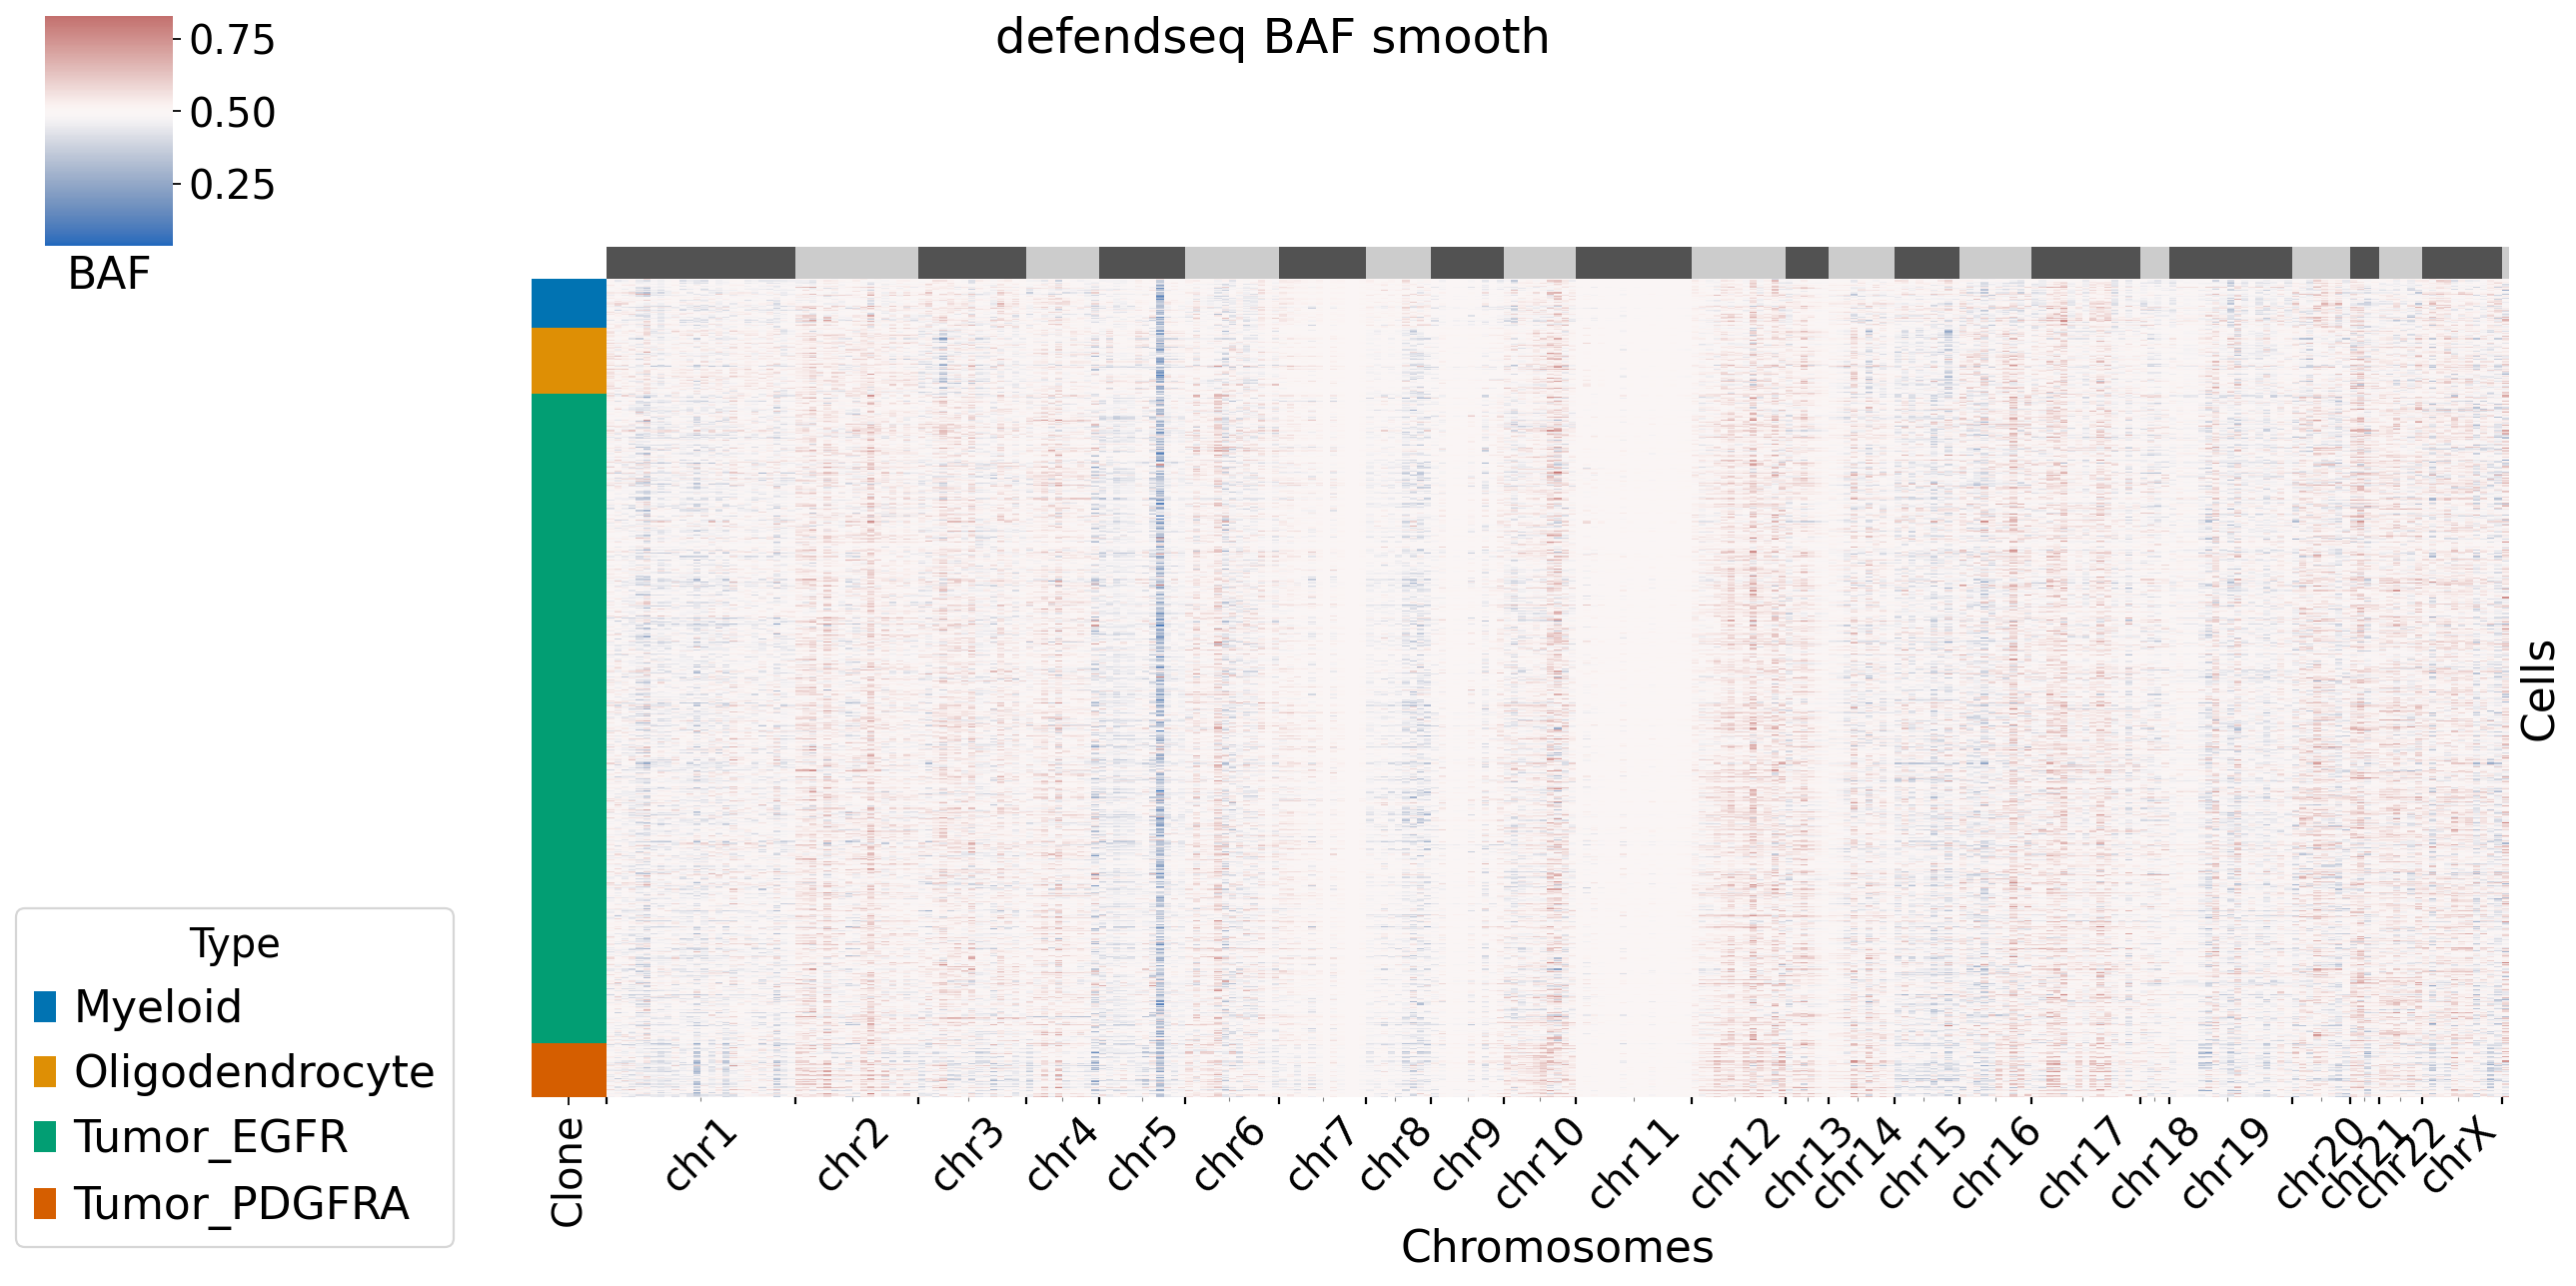

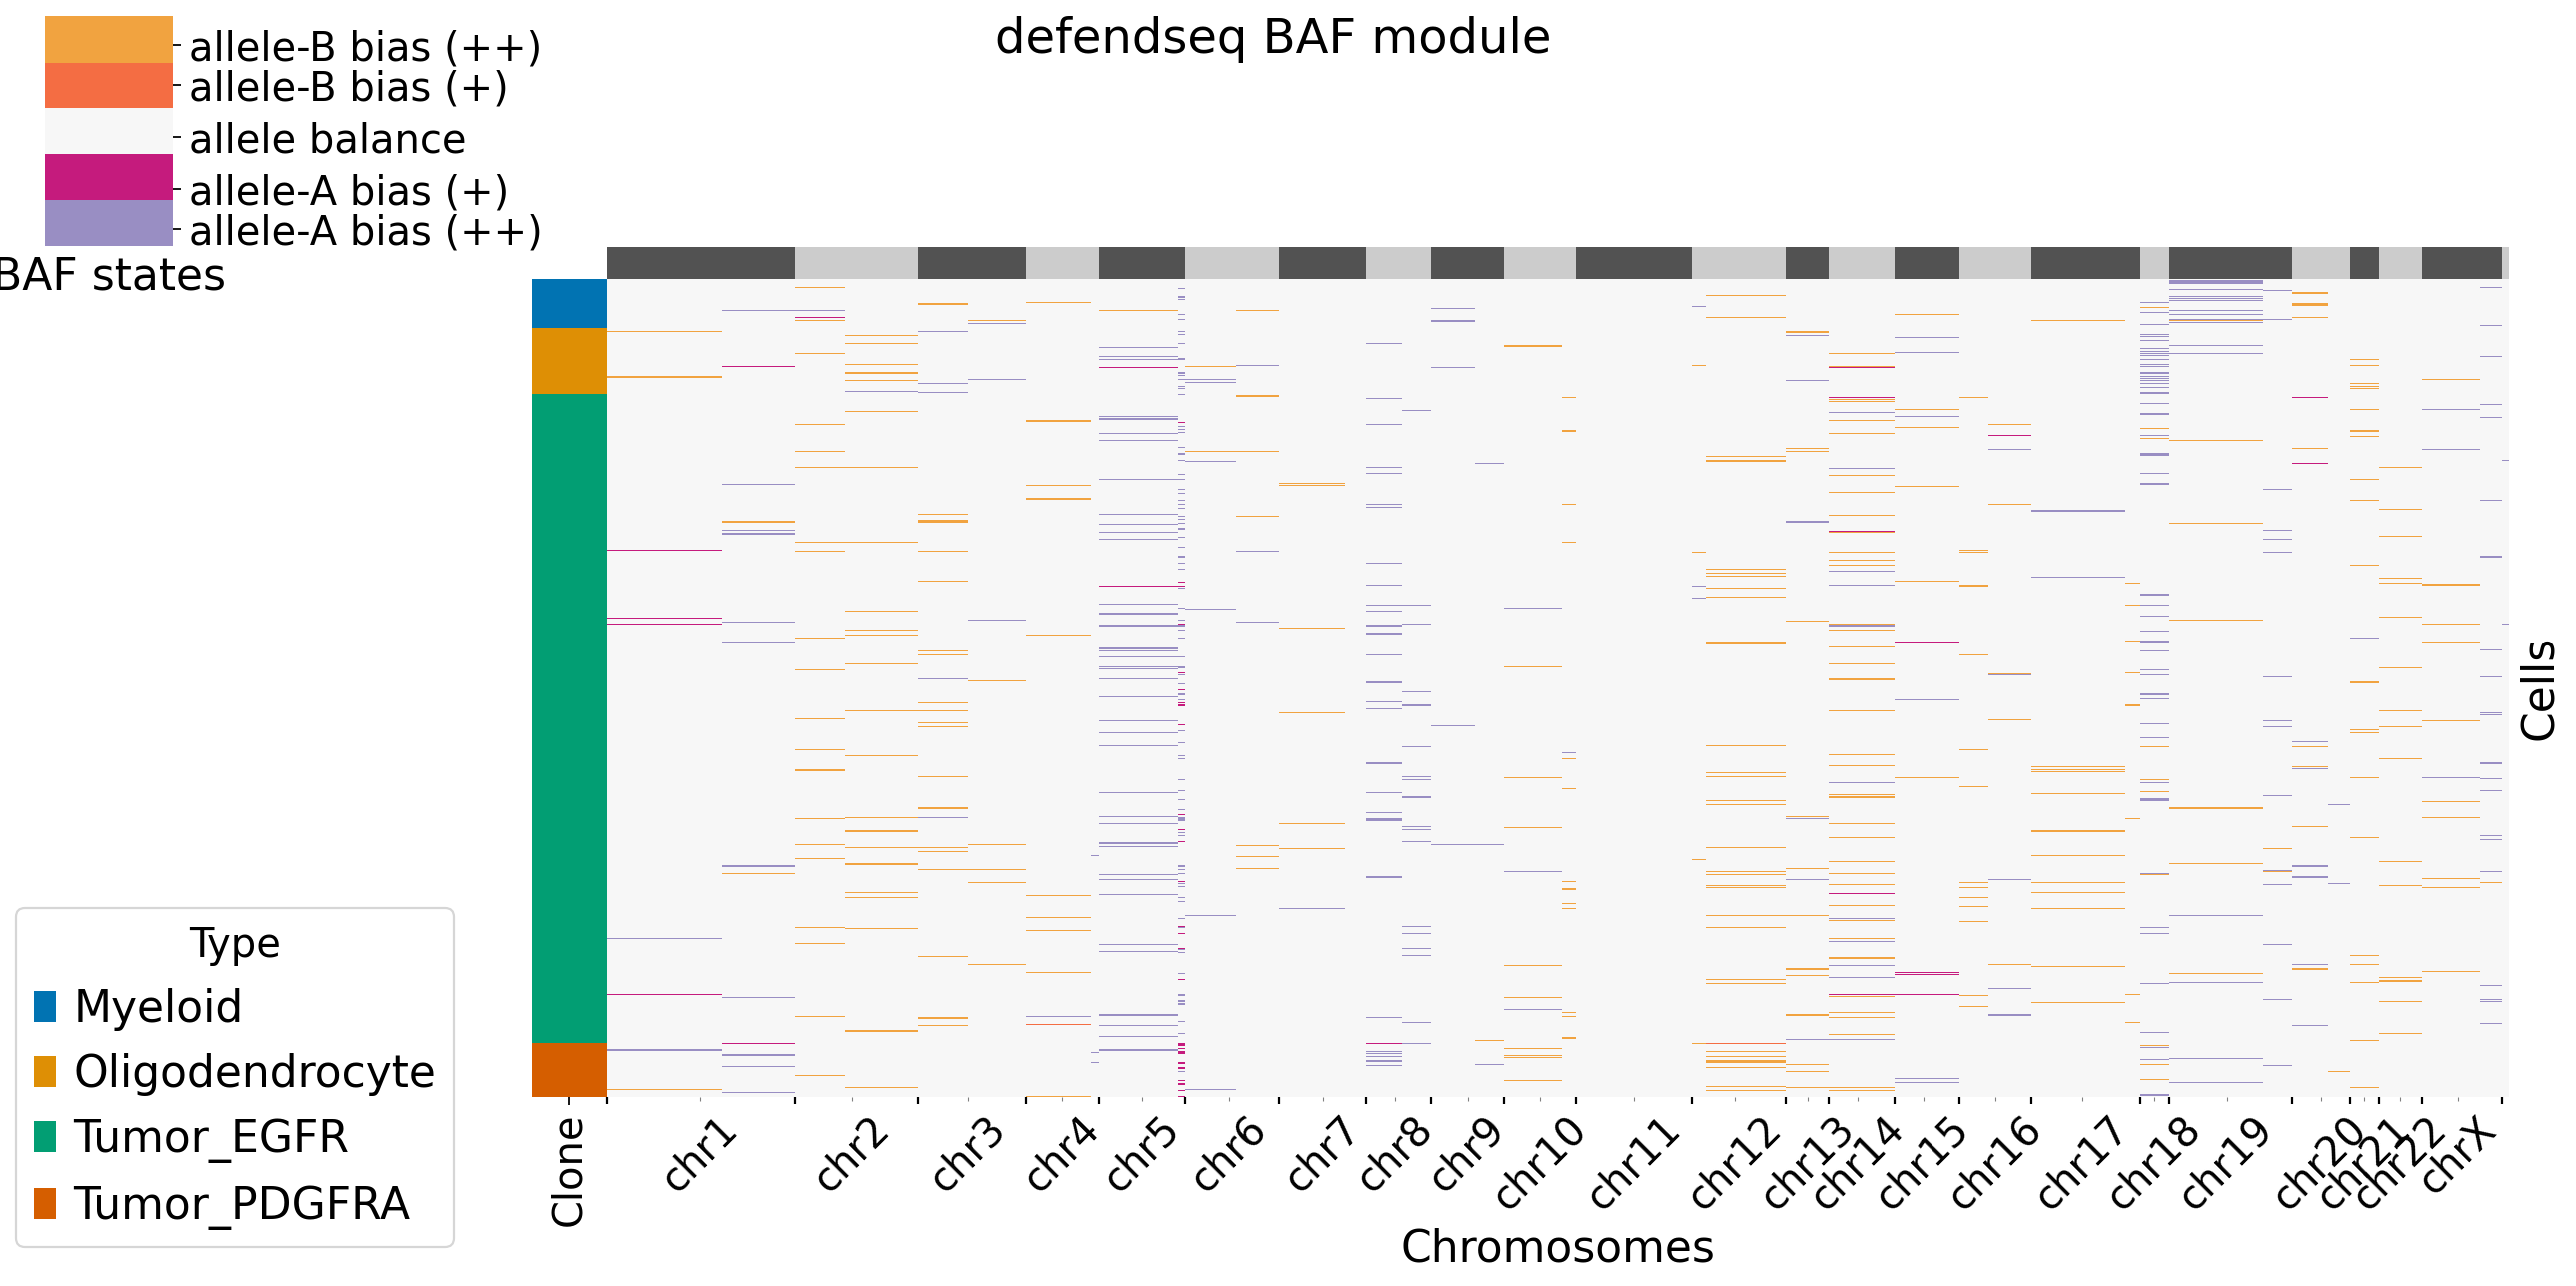

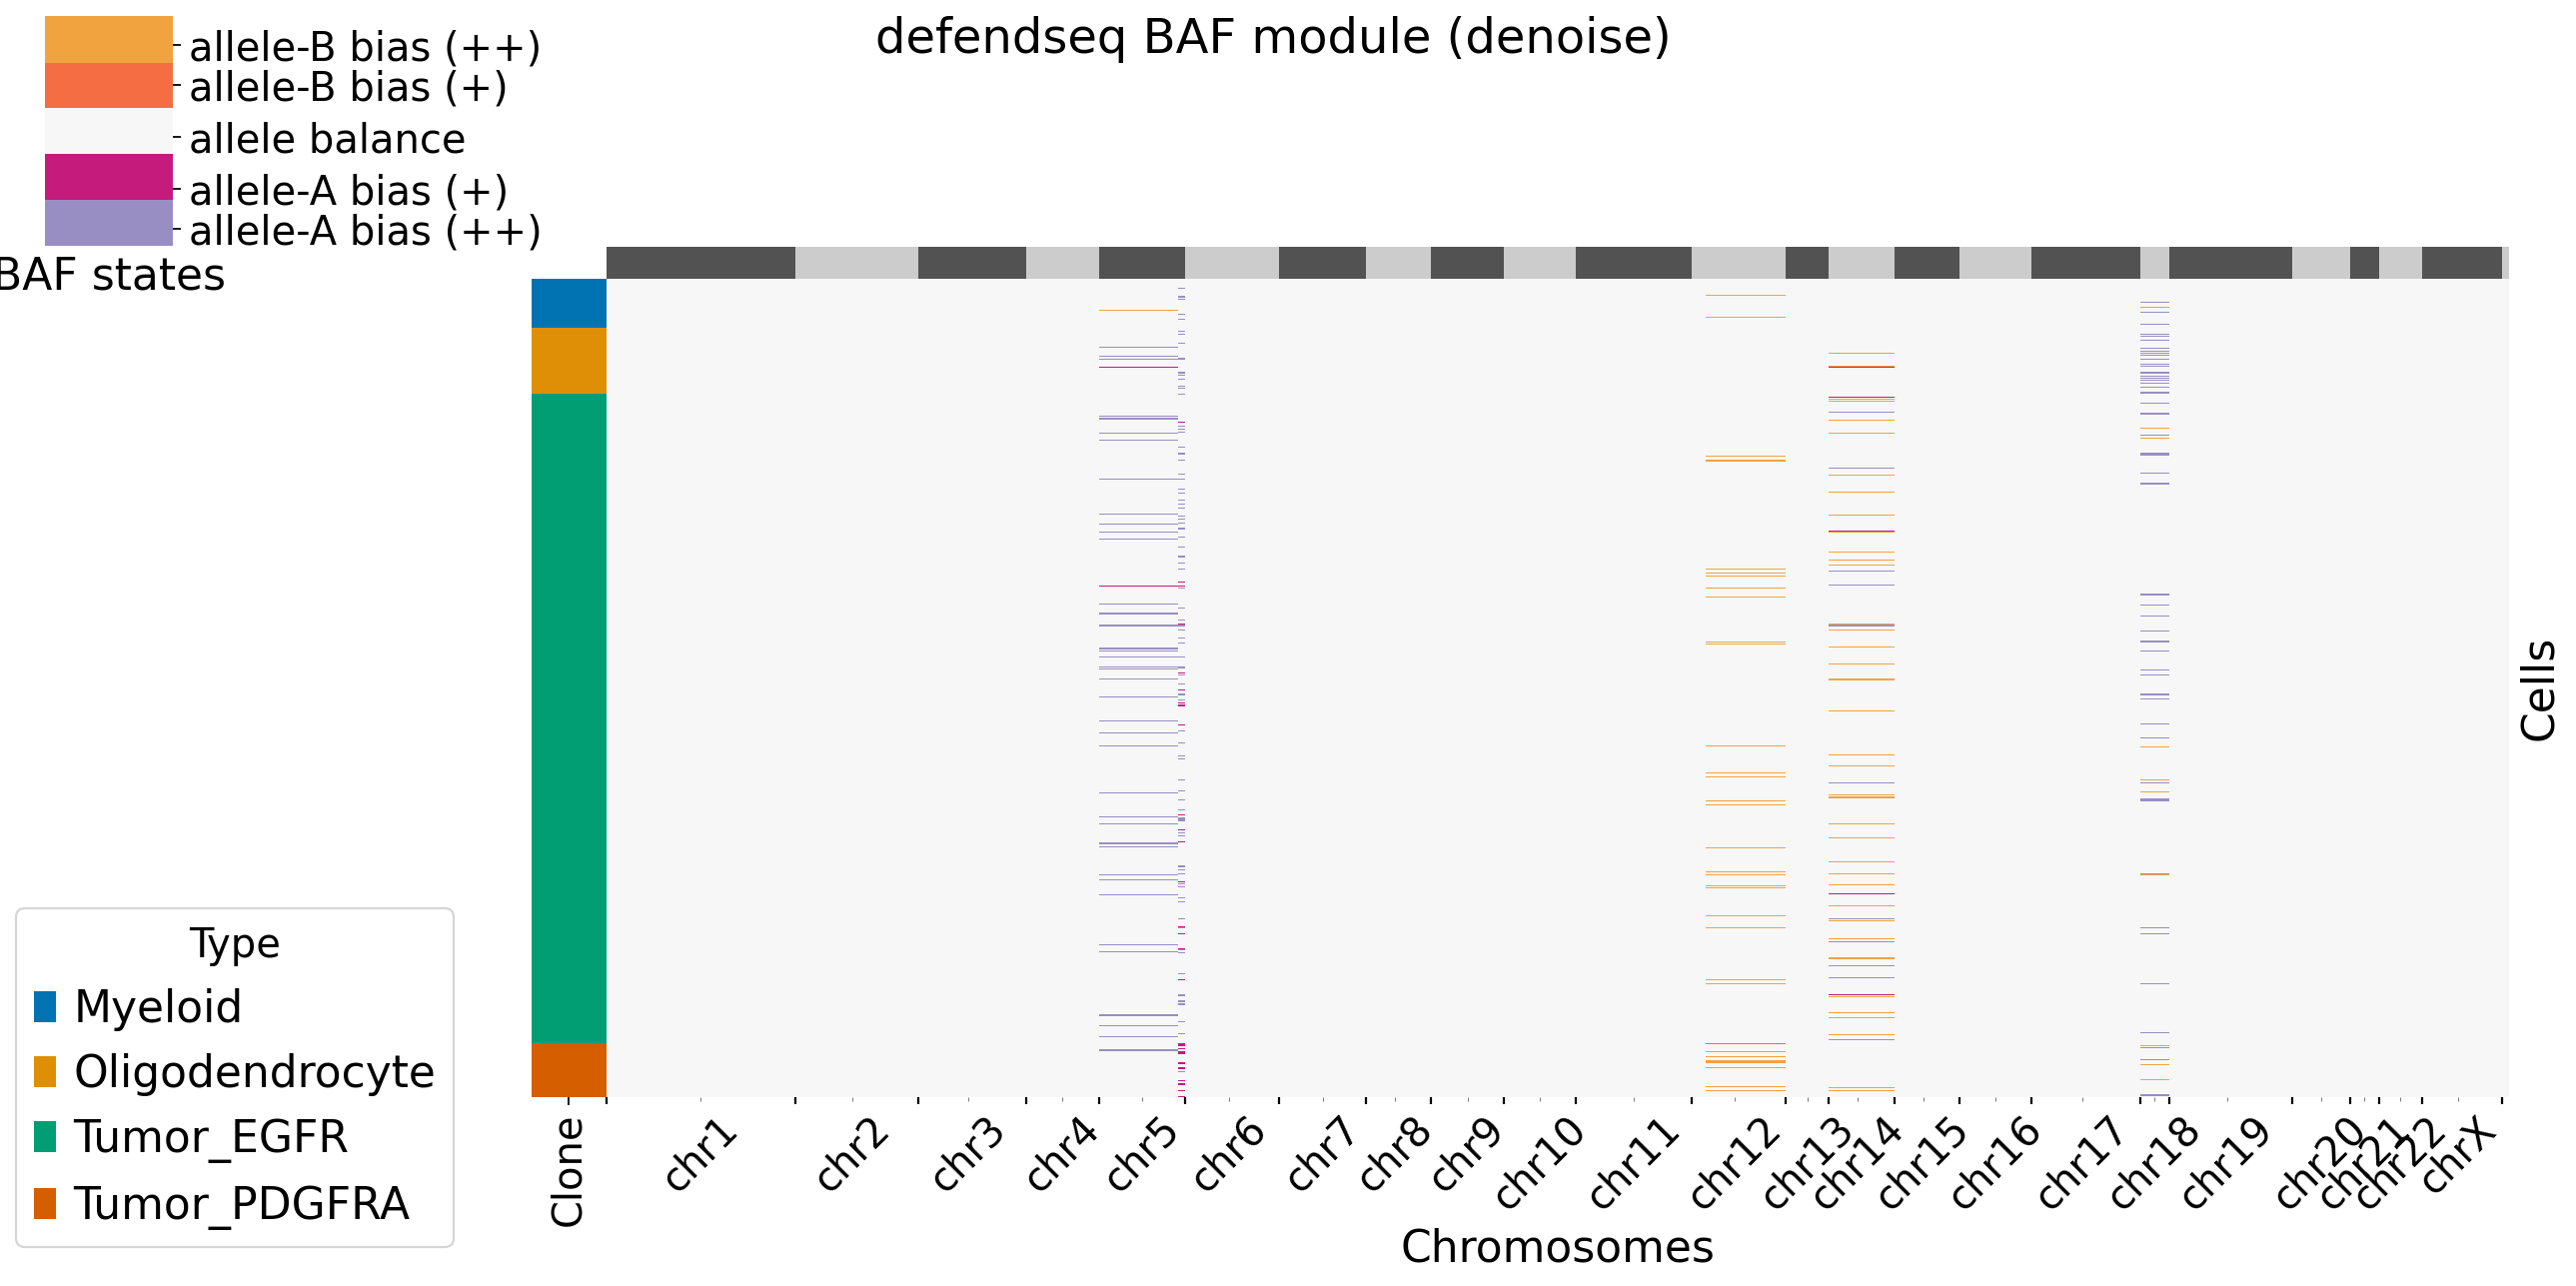

In [ ]:
xconfig = xclone.XCloneConfig(dataset_name = "defendseq", module = "BAF", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_defendseq/xclone_defendseq_outputs/ds_baf"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = None

xconfig.concentration = 35.5
xconfig.concentration_lower = 20
xconfig.concentration_upper = 100
xconfig.theo_neutral_BAF = 0.5

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.remove_guide_XY = False
xconfig.phasing_region_key = "chr"
xconfig.phasing_len = 100

xconfig.WMA_window_size = 6

xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.2, 0.15,  0.3, 0.15, 0.2])

t = xconfig.trans_t
xconfig.trans_prob = np.array([[1-4*t, t, t, t,t],[t, 1-4*t, t, t,t],[t, t, 1-4*t, t,t], [t, t, t, 1-4*t, t], [t, t, t, t, 1-4*t]])
xconfig.CNV_N_components = 5

xconfig.BAF_denoise = True
xconfig.RDR_file = "/home/sc5625/xclone_defendseq/xclone_defendseq_outputs/ds_rdr/data/RDR_adata_KNN_HMM_post.h5ad"
xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)


Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
KNN_npcs                       40
RDR_denoise                    False
RDR_prior                      True
WGD_cell_prop_threshold        50
WGD_detect_genome_level        chr_arm
WGD_detection                  True
WGD_prop_value_threshold       0.9
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_sims/xclone_defendseq_outputs/ds_combined
_plot_suffix                   
_start                         1750893857.2076647
_vector_friendly               True
cell_anno_key                  cell_type
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
customizedplotting             False
dataset_name                   defendseq
develop_mode                   False
exclude_XY                     False
f

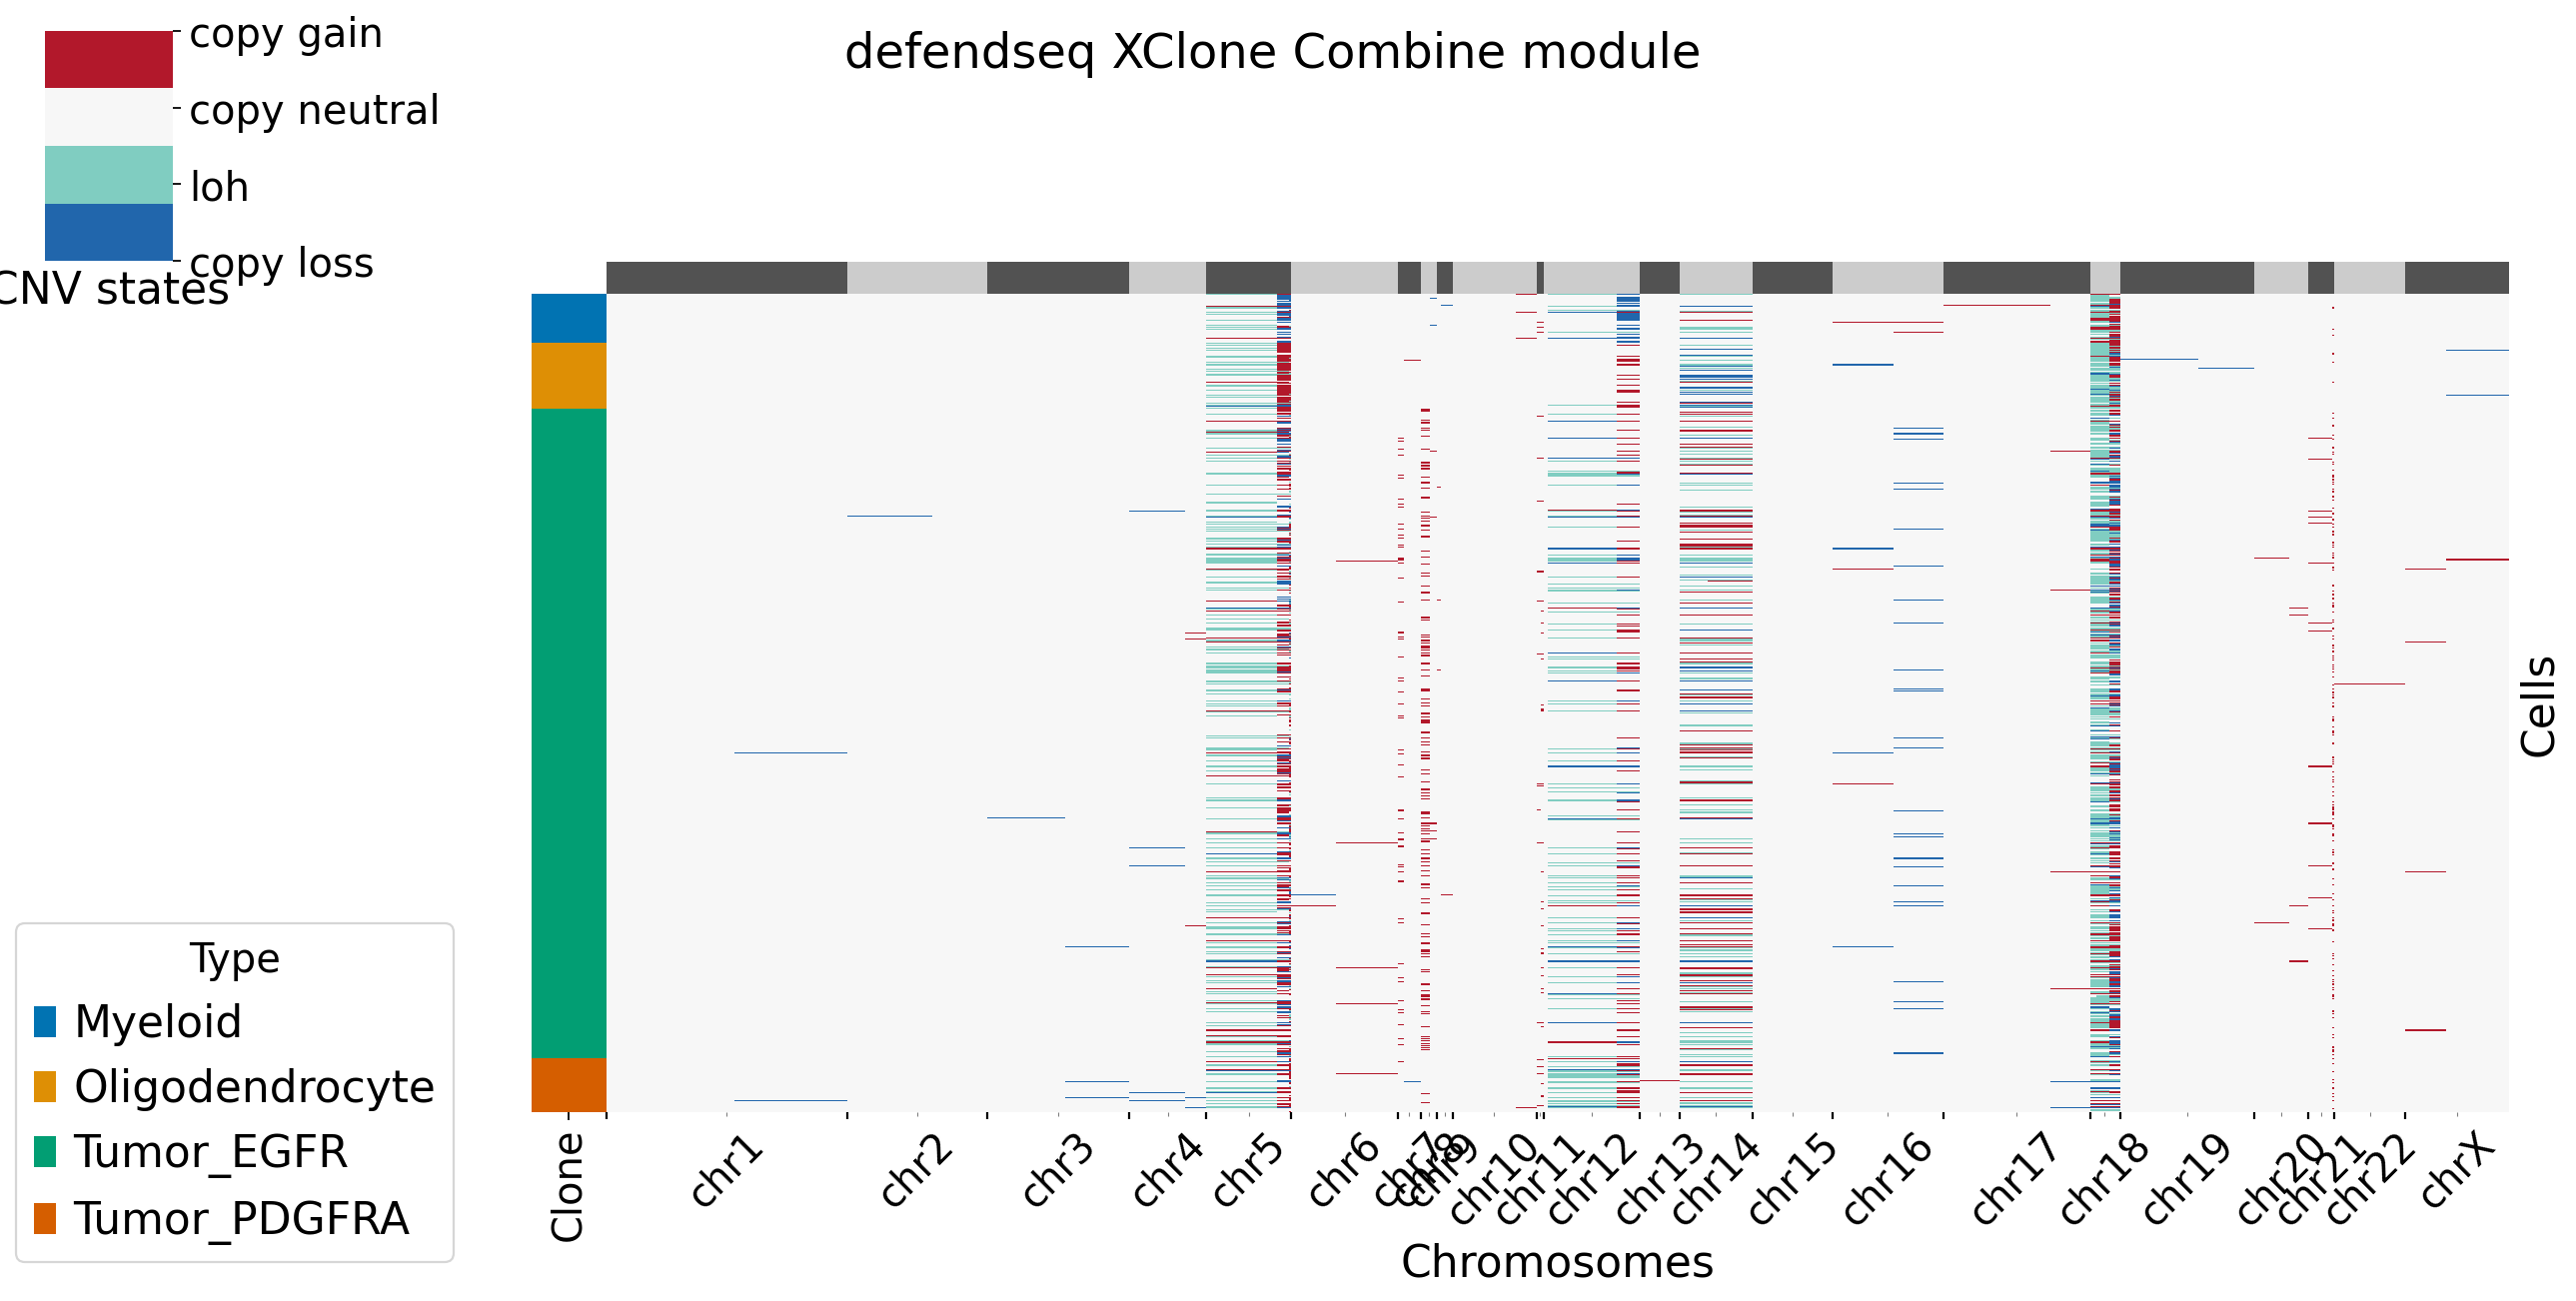

In [ ]:
xconfig = xclone.XCloneConfig(dataset_name = "defendseq", module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_defendseq/xclone_defendseq_outputs/ds_combined"

xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"


xconfig.copygain_correct= False

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.merge_loss = False
xconfig.merge_loh = True

xconfig.BAF_denoise = True
xconfig.display()

combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_filtered,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)